In [1]:
import numpy as np
from scipy.optimize import curve_fit
from tqdm import tqdm
import os
import re
import matplotlib.pyplot as plt
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Computer Modern",
    "figure.dpi": 100,
})
from FVSimulation_phase_density.Finite_volume_method_1D import *

In [2]:
chippath = '../DataKian/bTa_LT278W2chip5/'
lambdanm = 402
filename = 'KID5_103dBm__TmK20_avgpulse_ampphase.csv'
length = 90

KID = KID_data(chippath,lambdanm,filename,length)

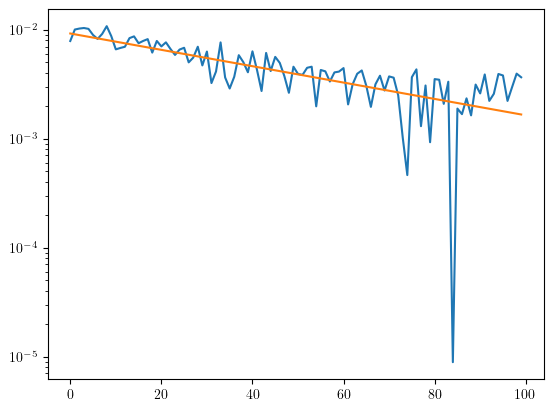

In [3]:
KID.fit_tail(start=150,end=250)

100%|██████████| 2000/2000 [00:04<00:00, 451.88it/s]


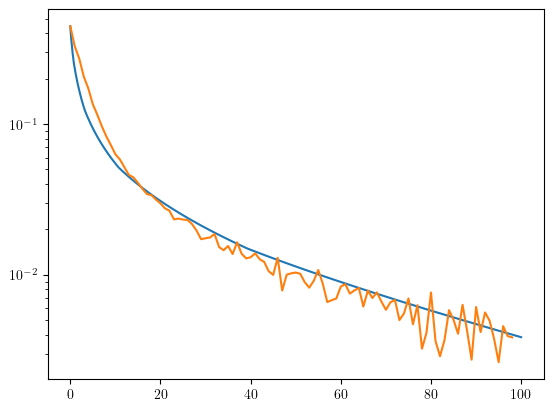

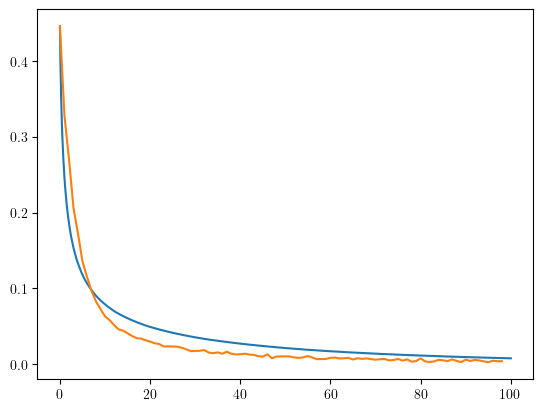

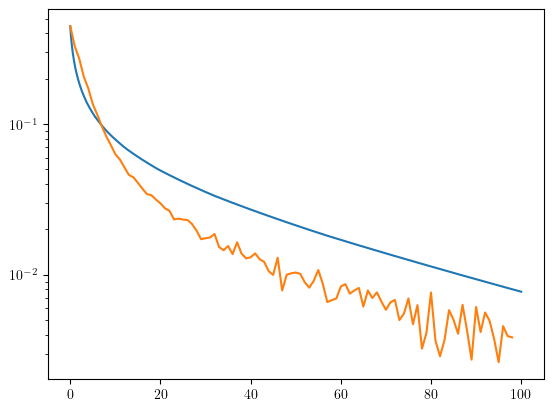

[D,K] =				 [11.57114701 83.48632356]
Std dev of [D,K] =		 [ 337.46629246 1160.40357091]
Correlation between parameters = 0.9999915949270238


In [4]:
offset = 3
simtime = 100
indmin = 100 + offset
indmax = 100 + simtime-1 + offset
fitdatax = KID.t_full[indmin:indmax]-indmin
fitdatay = KID.phase[indmin:indmax]

SIM = KID_sim(KID,50,200,0.1,1/4,sigma_IC=10,start_offset=offset,simtime_approx=simtime)

plt.plot(SIM.t_axis,SIM.timeseriestheta)
plt.semilogy(fitdatax,fitdatay)

def fitfunc(t,D,K): # probeer combinaties D,K en K,L
    SIM = KID_sim(KID,D,K,0.1,1/4,start_offset=offset,simtime_approx=simtime)
    return np.interp(t,SIM.t_axis,SIM.timeseriestheta)
popt,pcov=curve_fit(fitfunc,fitdatax,fitdatay,p0=[1,100],bounds=[0,[80,1000]])
SIM = KID_sim(KID,popt[0],popt[1],0.05,1/4,start_offset=offset,simtime_approx=simtime)
plt.figure()
plt.plot(SIM.t_axis,SIM.timeseriestheta)
plt.plot(fitdatax,fitdatay)
plt.show()
plt.figure()
plt.semilogy(SIM.t_axis,SIM.timeseriestheta)
plt.semilogy(fitdatax,fitdatay)
plt.show()
print('[D,K] =\t\t\t\t',popt)
stddevs = np.sqrt(np.diag(pcov))
corrcoeffs = (pcov/np.prod(stddevs))[0,1]
print('Std dev of [D,K] =\t\t',stddevs)
print('Correlation between parameters =',corrcoeffs)

100%|██████████| 1000/1000 [00:01<00:00, 699.05it/s]


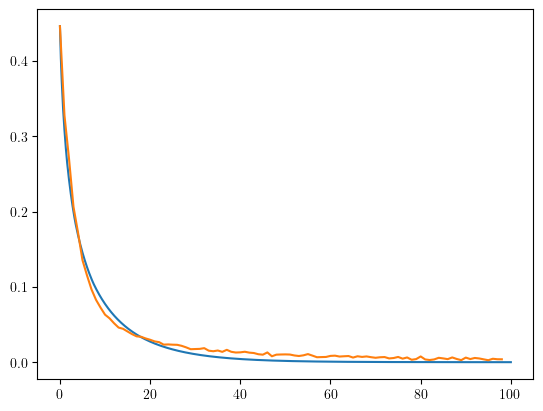

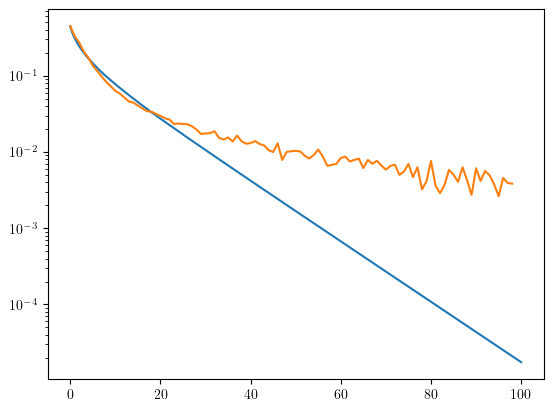

[L,K] =				 [ 0.09118141 67.2830884 ]
Std dev of [L,K] =		 [0.00519659 4.40695659]
Correlation between parameters = -0.8369062628076254


In [7]:
D=50
def fitfunc(t,L,K): # probeer combinaties D,K en K,L
    SIM = KID_sim(KID,D,K,0.1,1/4,L=L,start_offset=offset,simtime_approx=simtime)
    return np.interp(t,SIM.t_axis,SIM.timeseriestheta)
popt,pcov=curve_fit(fitfunc,fitdatax,fitdatay,p0=[0.1,200],bounds=[0,1000])
SIM = KID_sim(KID,D,popt[1],0.1,1/4,L=popt[0],start_offset=offset,simtime_approx=simtime)
plt.figure()
plt.plot(SIM.t_axis,SIM.timeseriestheta)
plt.plot(fitdatax,fitdatay)
plt.show()
plt.figure()
plt.semilogy(SIM.t_axis,SIM.timeseriestheta)
plt.semilogy(fitdatax,fitdatay)
plt.show()
print('[L,K] =\t\t\t\t',popt)
stddevs = np.sqrt(np.diag(pcov))
corrcoeffs = (pcov/np.prod(stddevs))[0,1]
print('Std dev of [L,K] =\t\t',stddevs)
print('Correlation between parameters =',corrcoeffs)